<a href="https://colab.research.google.com/github/RizqiRHuda/PVCK_Semester5/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODUL 6 – Histogram, Histogram Equalization, Dithering**

### Nama         : Rizqi Rohmatul Huda
### Kelas        : TI-3C
### Nomor Absen  : 21
### NIM          : 2141720264

## **Tugas Praktikum**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Library**

In [6]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

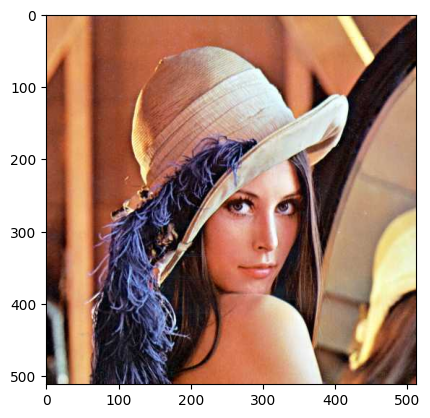

In [ ]:
image_lena = cv.imread('/content/drive/MyDrive/img_python/Images/lena.jpg')
image = cv.cvtColor(image_lena, cv.COLOR_BGR2RGB)
plt.imshow(image)

3. Code berdasarkan flowchart

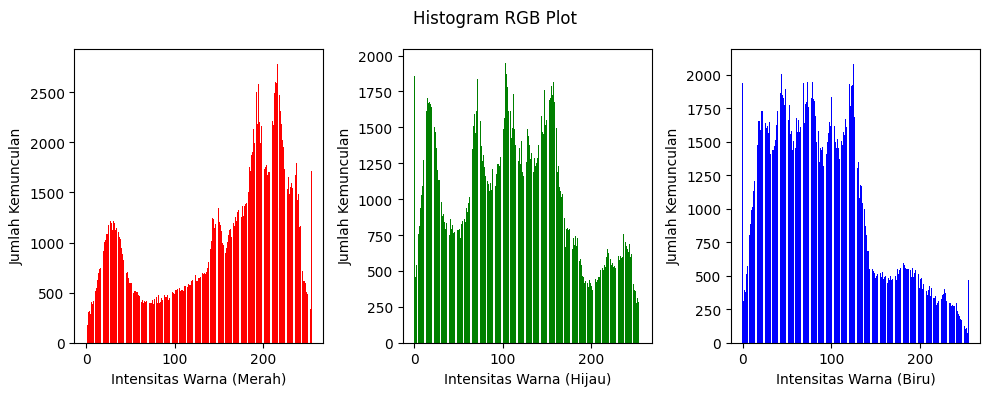

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_histogram(channel):
    """Menghitung histogram untuk satu kanal warna."""
    hist, bins = np.histogram(channel.flatten(), 256, [0, 256])
    return hist, bins

# Baca gambar
image_path = '/content/drive/MyDrive/img_python/Images/lena.jpg'
image = cv2.imread(image_path)

# Pisahkan kanal warna (R, G, B)
b, g, r = cv2.split(image)

# Menghitung histogram untuk masing-masing kanal warna
hist_r, bins_r = calculate_histogram(r)
hist_g, bins_g = calculate_histogram(g)
hist_b, bins_b = calculate_histogram(b)

# Membuat histogram citra untuk masing-masing kanal warna
plt.figure(figsize=(10, 4))
plt.suptitle('Histogram RGB Plot')  # Judul utama

# Plot histogram untuk kanal Merah (R)
plt.subplot(131)
plt.bar(range(256), hist_r, color='red', alpha=1)
plt.ylabel('Jumlah Kemunculan')
plt.xlabel('Intensitas Warna (Merah)')

# Plot histogram untuk kanal Hijau (G)
plt.subplot(132)
plt.bar(range(256), hist_g, color='green', alpha=1)
plt.ylabel('Jumlah Kemunculan')
plt.xlabel('Intensitas Warna (Hijau)')

# Plot histogram untuk kanal Biru (B)
plt.subplot(133)
plt.bar(range(256), hist_b, color='blue', alpha=1)
plt.ylabel('Jumlah Kemunculan')
plt.xlabel('Intensitas Warna (Biru)')

plt.tight_layout()
plt.show()


4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya.

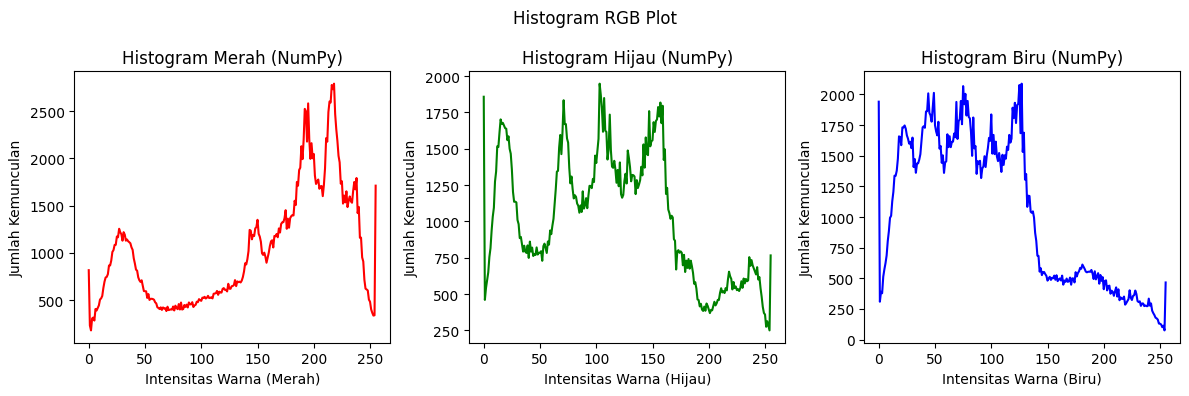

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
image_path = '/content/drive/MyDrive/img_python/Images/lena.jpg'
image = cv2.imread(image_path)

# Pisahkan kanal warna (R, G, B)
b, g, r = cv2.split(image)

# Menghitung histogram untuk masing-masing kanal warna menggunakan NumPy
hist_r_np, bins_r_np = np.histogram(r.flatten(), 256, [0, 256])
hist_g_np, bins_g_np = np.histogram(g.flatten(), 256, [0, 256])
hist_b_np, bins_b_np = np.histogram(b.flatten(), 256, [0, 256])

# Membuat histogram citra untuk masing-masing kanal warna
plt.figure(figsize=(12, 4))
plt.suptitle('Histogram RGB Plot')  # Judul utama

# Plot histogram untuk kanal Merah (R) menggunakan NumPy
plt.subplot(131)
plt.plot(hist_r_np, color='red')
plt.ylabel('Jumlah Kemunculan')
plt.xlabel('Intensitas Warna (Merah)')
plt.title('Histogram Merah (NumPy)')

# Plot histogram untuk kanal Hijau (G) menggunakan NumPy
plt.subplot(132)
plt.plot(hist_g_np, color='green')
plt.ylabel('Jumlah Kemunculan')
plt.xlabel('Intensitas Warna (Hijau)')
plt.title('Histogram Hijau (NumPy)')

# Plot histogram untuk kanal Biru (B) menggunakan NumPy
plt.subplot(133)
plt.plot(hist_b_np, color='blue')
plt.ylabel('Jumlah Kemunculan')
plt.xlabel('Intensitas Warna (Biru)')
plt.title('Histogram Biru (NumPy)')

plt.tight_layout()
plt.show()


## **Apakah output muncul sama?**
### **Jawab :**
* Iya, Kedua metode, baik menggunakan matplotlib maupun numpy, memberikan hasil yang sama dalam hal menampilkan histogram masing-masing kanal warna (R, G, B).
* Fungsi np.histogram dari NumPy digunakan untuk menghitung histogram dengan membagi rentang intensitas warna menjadi 256 bin (0-255) untuk setiap kanal warna.
* Pemilihan metode (matplotlib atau NumPy) dapat bergantung pada preferensi atau kebutuhan. NumPy memiliki keuntungan dalam kinerja dan kenyamanan saat bekerja dengan array dan data numerik. Namun, menggunakan matplotlib sering lebih fleksibel dalam menampilkan grafik dengan gaya dan pengaturan yang lebih kaya.

 5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

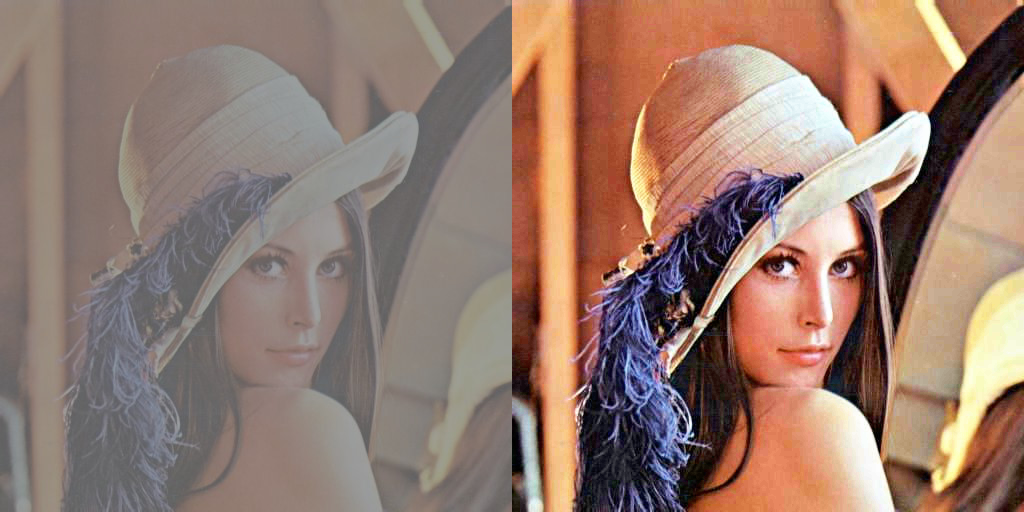

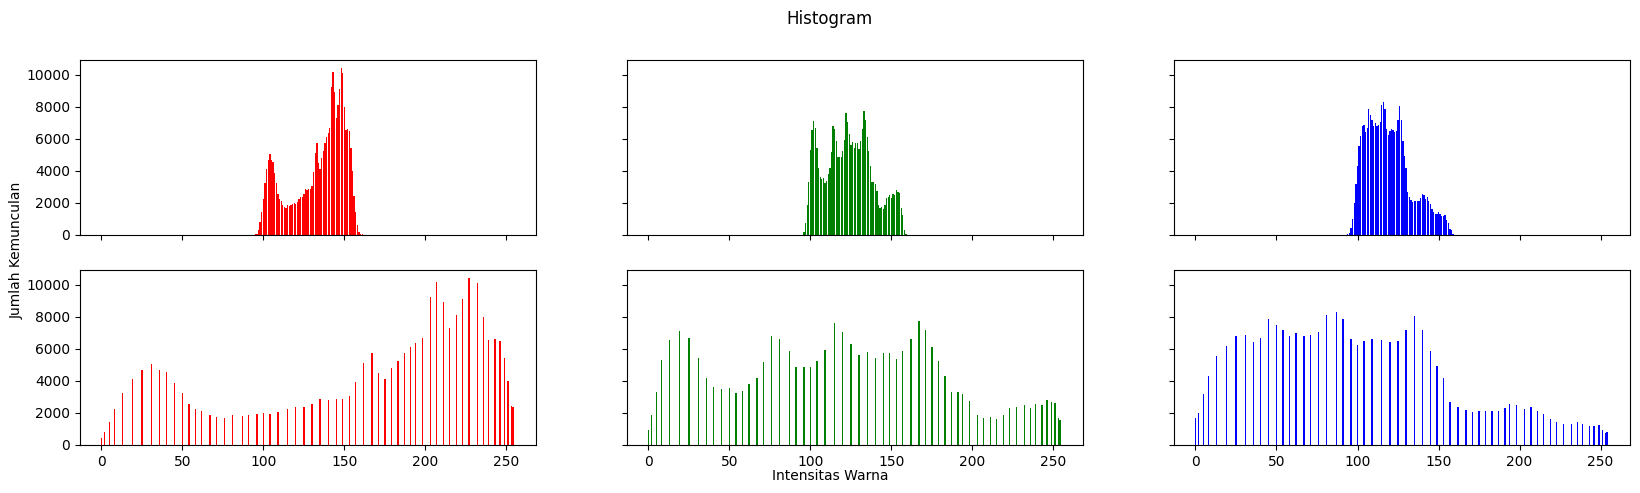

In [8]:
original_img = cv.imread('/content/drive/MyDrive/img_python/Images/lena_lc.jpg')
def histog(original_img):
  height, width, depth = np.shape(original_img)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][original_img[y][x][0]] += 1
      ax[1][original_img[y][x][1]] += 1
      ax[2][original_img[y][x][2]] += 1
  return ax

original_histogram = histog(original_img)


img_array = np.asarray(original_img)

# Step 1: Menghitung histogram normalisasi
# Melakukan flatten pada array gambar dan menghitung histogram dengan binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)


num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

# Menghitung histogram kumulatif normalisasi
chistogram_array = np.cumsum(histogram_array)

# Step 2: Membuat tabel pencocokan nilai piksel
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

# Step 3: Melakukan transformasi
# Mengubah array gambar menjadi list
img_list = list(img_array.flatten())

# Melakukan transformasi nilai piksel untuk melakukan ekualisasi
eq_img_list = [transform_map[p] for p in img_list]

# Mengubah kembali menjadi array dan reshape
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
image_eq = eq_img_array
# Menghitung histogram setelah ekualisasi
equal_histo = histog(image_eq)
# Menggabungkan gambar asli dan gambar setelah ekualisasi
final_frame = cv.hconcat((original_img, image_eq))
cv2_imshow(final_frame)

names = np.arange (256)

blue = [0]*256
green = [0]*256
red = [0]*256

isgrayimg = np.array_equal(blue, green, red)
# Menampilkan histogram
fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
# Menampilkan histogram warna dari gambar asli
axs[0,0].bar(names, original_histogram[2], color='red')
axs[0,1].bar(names, original_histogram[1], color='green')
axs[0,2].bar(names, original_histogram[0], color='blue')
# Menampilkan histogram warna setelah ekualisasi
axs[1,0].bar(names, equal_histo[2], color='red')
axs[1,1].bar(names, equal_histo[1], color='green')
axs[1,2].bar(names, equal_histo[0], color='blue')

plt.show()

 6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?

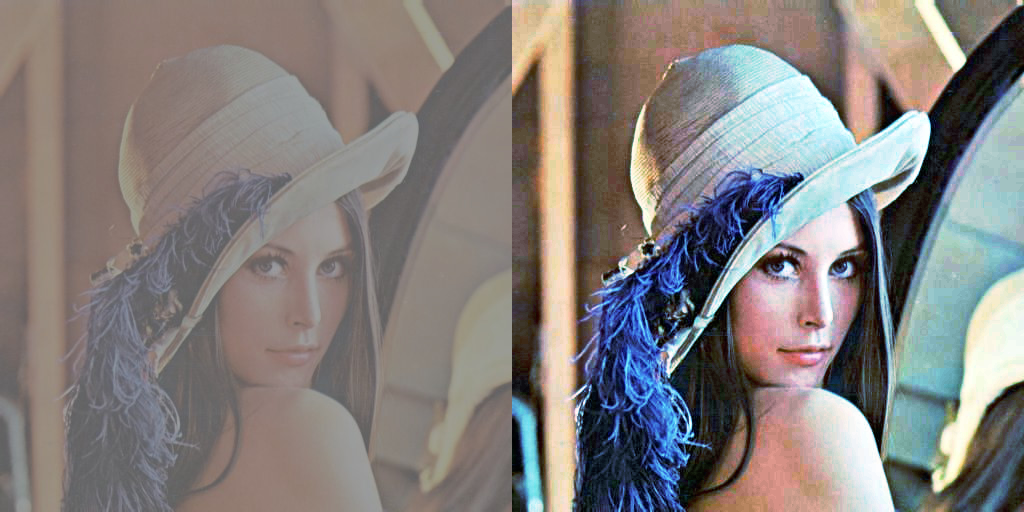

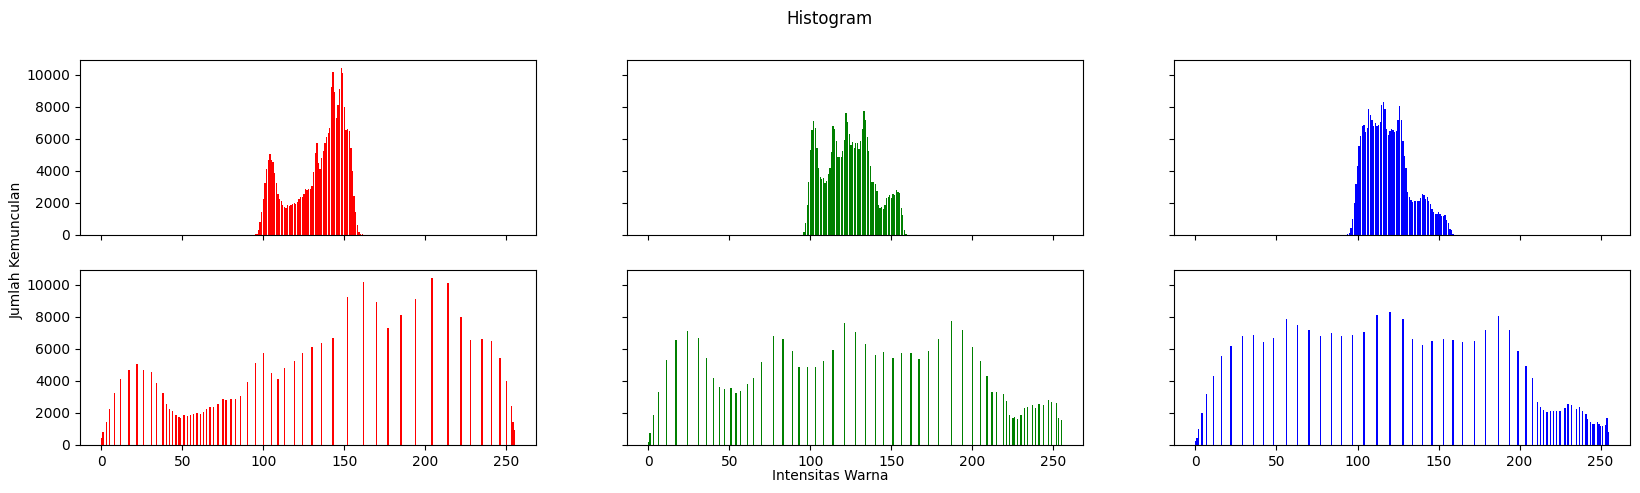

In [13]:
img = cv.imread('/content/drive/MyDrive/img_python/Images/lena_lc.jpg')

# Fungsi untuk menghitung histogram
def calculate_histogram(image):
    histogram = np.zeros((3, 256))
    height, width, _ = np.shape(image)
    for y in range(height):
        for x in range(width):
            histogram[0][image[y][x][0]] += 1  # Red channel
            histogram[1][image[y][x][1]] += 1  # Green channel
            histogram[2][image[y][x][2]] += 1  # Blue channel
    return histogram

# Membagi gambar menjadi saluran warna (red, green, blue)
channels = cv.split(img)
equalized_channels = []
for ch, color in zip(channels, ["r", "g", "b"]):
    # Melakukan ekualisasi histogram pada masing-masing saluran warna
    equalized_channels.append(cv2.equalizeHist(ch))

# Menggabungkan saluran warna yang telah di-ekualisasi
equalized_image = cv.merge(equalized_channels)

# Menghitung histogram setelah ekualisasi
equalized_histogram = calculate_histogram(equalized_image)

# Menggabungkan gambar asli dan gambar setelah ekualisasi
final_frame = cv.hconcat((img, equalized_image))
cv2_imshow( final_frame)


# Persiapan data untuk plotting histogram
names = np.arange(256)

# Menampilkan histogram
fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

# Menampilkan histogram warna dari gambar asli
axs[0, 0].bar(names, original_histogram[2], color='red')
axs[0, 1].bar(names, original_histogram[1], color='green')
axs[0, 2].bar(names, original_histogram[0], color='blue')

# Menampilkan histogram warna setelah ekualisasi
axs[1, 0].bar(names, equalized_histogram[2], color='red')
axs[1, 1].bar(names, equalized_histogram[1], color='green')
axs[1, 2].bar(names, equalized_histogram[0], color='blue')

plt.show()


### Iya sama, output  yang dihasilkan dari EqualizeHist pada CV2 memberikan hasil yang sama.

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)


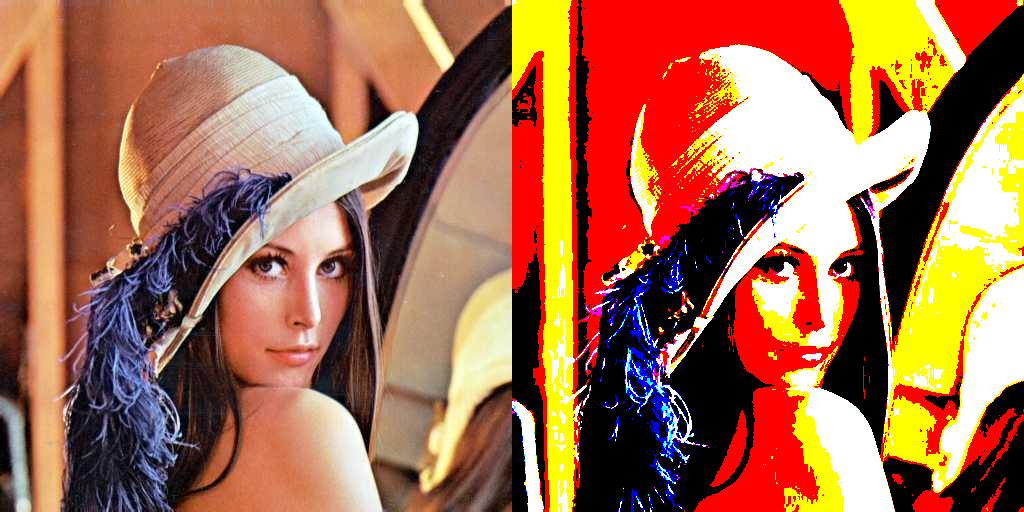

In [15]:
import cv2
import numpy as np

lena_image = cv2.imread('/content/drive/MyDrive/img_python/Images/lena.jpg')

def color_mapping(r, g, b):
    p_value = 0
    min_distance = 255*255 + 255*255 + 255*255 + 1
    color_palette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]

    for i in range(len(color_palette)):
        r_diff = r - color_palette[i][0]
        g_diff = g - color_palette[i][1]
        b_diff = b - color_palette[i][2]
        distance = r_diff * r_diff + g_diff * g_diff + b_diff * b_diff
        if distance < min_distance:
            min_distance = distance
            p_value = i

    return p_value

color_palette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]

img_16_colors = cv2.cvtColor(lena_image, cv2.COLOR_BGR2RGB)
img_8_colors = np.zeros(img_16_colors.shape, img_16_colors.dtype)

for y in range(0, img_16_colors.shape[0]):
    for x in range(0, img_16_colors.shape[1]):
        img_after = color_mapping(img_16_colors[y, x, 0], img_16_colors[y, x, 1], img_16_colors[y, x, 2])
        img_8_colors[y, x] = color_palette[img_after]

img_16_colors = cv2.cvtColor(img_16_colors, cv2.COLOR_BGR2RGB)
img_8_colors = cv2.cvtColor(img_8_colors, cv2.COLOR_BGR2RGB)

final_frame = cv2.hconcat((img_16_colors, img_8_colors))
cv2_imshow( final_frame)


8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

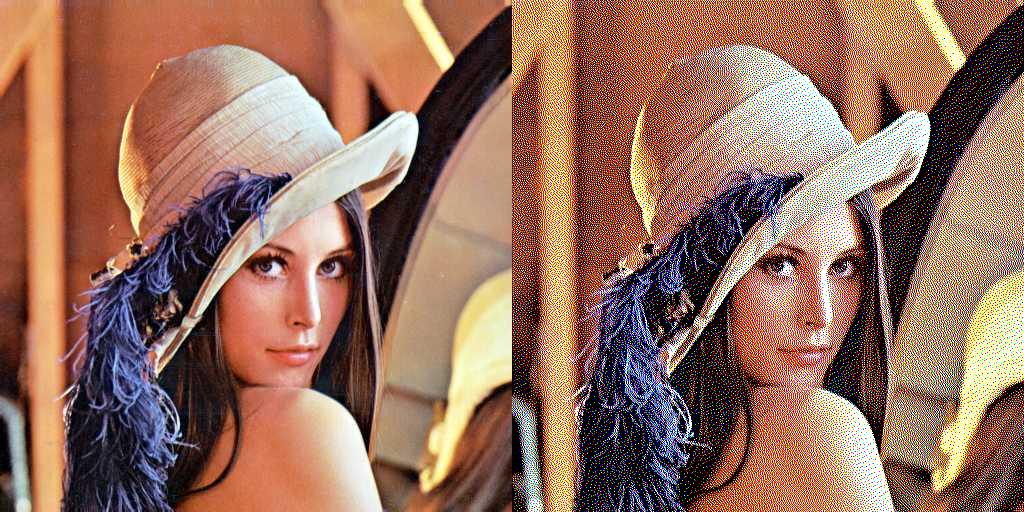

In [18]:
# Memuat gambar asli
img_original = cv2.imread('/content/drive/MyDrive/img_python/Images/lena.jpg')

# Fungsi untuk menerapkan metode dithering Floyd-Steinberg
def floyd_steinberg_dithering(image):
    tinggi = image.shape[0]  # Tinggi citra
    lebar = image.shape[1]   # Lebar citra
    channel = image.shape[2]  # Jumlah saluran warna (misalnya: RGB)

    # Jarak antar piksel dalam dithering
    jarak_pixel = 1

    # Iterasi setiap piksel dalam citra
    for y in range(tinggi):
        for x in range(lebar):
            for c in range(channel):
                pixel_lama = image[y, x, c]  # Nilai piksel asli

                # Menghitung nilai piksel baru berdasarkan rumus dithering
                pixel_baru = np.round((jarak_pixel * pixel_lama) / 255.0) * (255 / jarak_pixel)
                image[y, x, c] = pixel_baru
                error = pixel_lama - pixel_baru

                # Penyebaran error menggunakan koefisien Floyd-Steinberg
                if x + 1 < lebar:
                    image[y, x + 1, c] = threshold(image[y, x + 1, c] + error * 7/16)
                if y + 1 < tinggi:
                    if x - 1 >= 0:
                        image[y + 1, x - 1, c] = threshold(image[y + 1, x - 1, c] + error * 3/16)
                    image[y + 1, x, c] = threshold(image[y + 1, x, c] + error * 5/16)
                    if x + 1 < lebar:
                        image[y + 1, x + 1, c] = threshold(image[y + 1, x + 1, c] + error * 1/16)
    return image

# Fungsi untuk membatasi nilai warna dalam rentang yang valid (0-255)
def threshold(nilai_warna):
    if nilai_warna > 255:
        nilai_warna = 255
    elif nilai_warna < 0:
        nilai_warna = 0

    return nilai_warna


img_copy = np.copy(img_original)
# Menerapkan dithering Floyd-Steinberg
dithered_image = floyd_steinberg_dithering(img_copy)
hasil_akhir = cv2.hconcat((img_original, dithered_image))
# Menampilkan gambar asli dan hasil dithering
cv2_imshow(hasil_akhir)


9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!

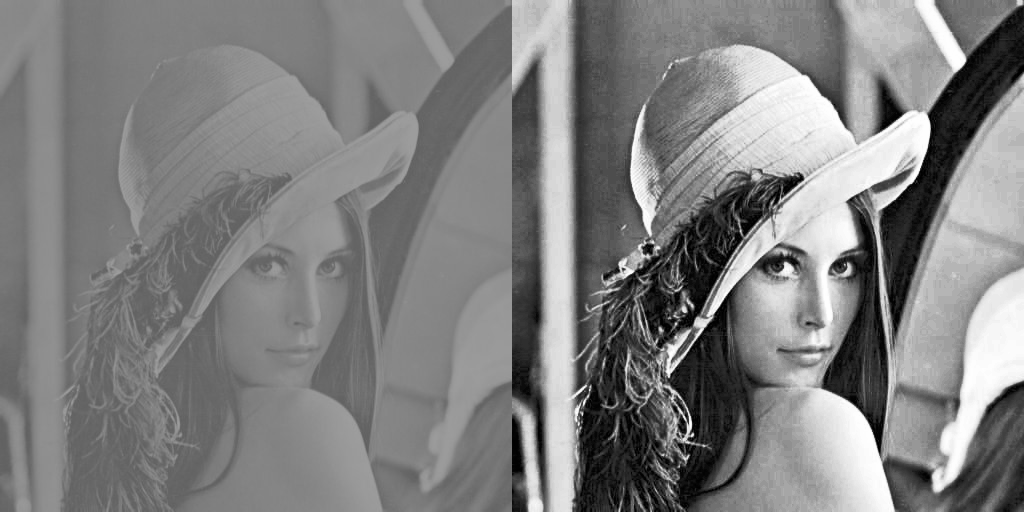

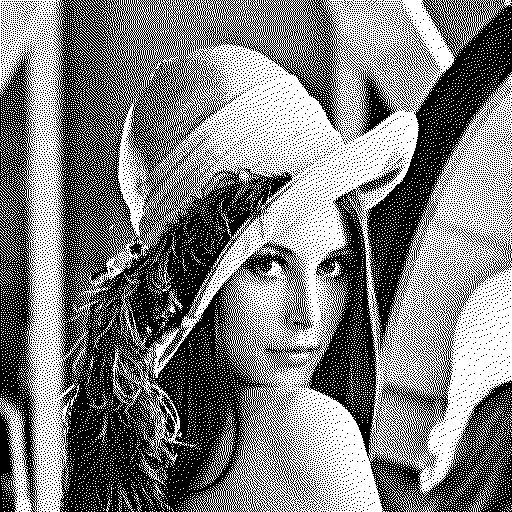

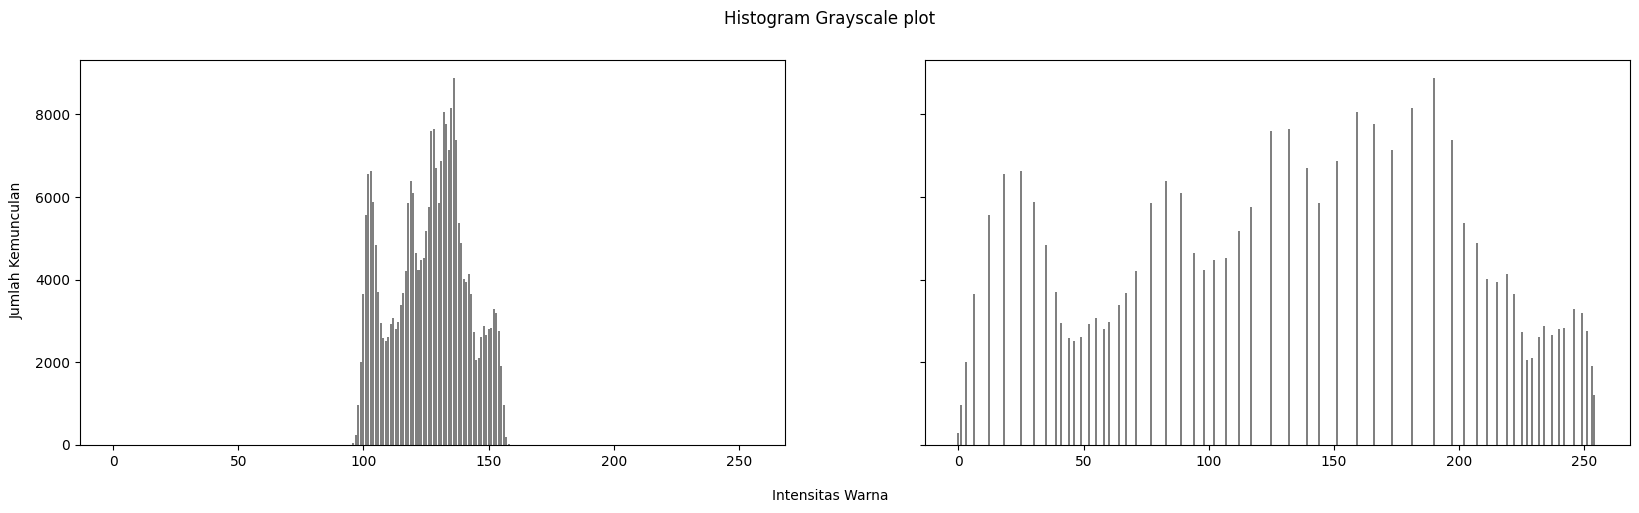

In [20]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Mengakses  citra asli
gambar_asli = cv2.imread('/content/drive/MyDrive/img_python/Images/lena_lc.jpg', cv2.IMREAD_GRAYSCALE)

# Fungsi untuk menghitung histogram
def hitung_histogram(gambar):
    tinggi, lebar = gambar.shape
    hist = np.zeros(256)
    for y in range(tinggi):
        for x in range(lebar):
            pixel = gambar[y, x]
            hist[pixel] += 1
    return hist

# Fungsi untuk melakukan equalisasi histogram
def equalisasi_histogram(gambar):
    tinggi, lebar = gambar.shape
    hist = hitung_histogram(gambar) # Hitung histogram gambar asli
    cdf = np.cumsum(hist)
    cdf_normalisasi = cdf / (tinggi * lebar)
    transformasi_peta = np.floor(255 * cdf_normalisasi).astype(np.uint8)
    gambar_equalized = np.zeros((tinggi, lebar), dtype=np.uint8)
    for y in range(tinggi):
        for x in range(lebar):
            gambar_equalized[y, x] = transformasi_peta[gambar[y, x]]
    return gambar_equalized

# Menerapkan equalisasi histogram
gambar_equalized = equalisasi_histogram(gambar_asli)

# Mengimplementasikan proses dithering Floyd-Steinberg pada citra hasil equalisasi
gambar_dithered = np.copy(gambar_equalized)
tinggi, lebar = gambar_dithered.shape

# Proses dithering Floyd and Steinberg
for y in range(0, tinggi):
    for x in range(0, lebar):
        old_value = gambar_dithered[y, x]
        new_value = 0
        if (old_value > 128):
            new_value = 255
        gambar_dithered[y, x] = new_value
        error = old_value - new_value

        if (x + 1 < lebar):
            gambar_dithered[y, x + 1] = threshold(gambar_dithered[y, x + 1] + error * 7/16)
        if (y + 1 < tinggi):
            if (x - 1 >= 0):
                gambar_dithered[y + 1, x - 1] = threshold(gambar_dithered[y + 1, x - 1] + error * 3/16)
            gambar_dithered[y + 1, x] = threshold(gambar_dithered[y + 1, x] + error * 5/16)
            if (x + 1 < lebar):
                gambar_dithered[y + 1, x + 1] = threshold(gambar_dithered[y + 1, x + 1] + error * 1/16)

# Fungsi untuk membatasi nilai warna
def threshold(nilai_warna):
    if nilai_warna > 255:
        return 255
    elif nilai_warna < 0:
        return 0
    else:
        return nilai_warna

# Hitung histogram untuk citra grayscale asli dan citra hasil equalisasi
original_histogram = np.histogram(gambar_asli.flatten(), bins=256, range=[0, 256])
equalized_histogram = np.histogram(gambar_equalized.flatten(), bins=256, range=[0, 256])

# Menampilkan histogram grayscale
fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram Grayscale plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0, 'Intensitas Warna', ha='center')
axs[0].bar(range(256), original_histogram[0], color='gray')
axs[1].bar(range(256), equalized_histogram[0], color='gray')

# Tampilkan citra hasil
hasil_akhir = cv2.hconcat((gambar_asli, gambar_equalized))
cv2_imshow(hasil_akhir)
cv2_imshow(gambar_dithered)
